<a href="https://colab.research.google.com/github/get2aakash/DSMLprojects/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys,traceback

In [56]:
hr_data = pd.read_csv("train.csv") 
hr_data.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [57]:
hr_data.shape

(25491, 10)

In [58]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [59]:
hr_data.isnull().any()

satisfaction_level        False
last_evaluation_rating    False
projects_worked_on        False
average_montly_hours      False
time_spend_company        False
Work_accident             False
promotion_last_5years     False
Department                False
salary                    False
Attrition                 False
dtype: bool

In [60]:
hr_data.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [61]:
hr_data["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [62]:
hr_data["Department"].value_counts()

sales          6973
technical      4661
support        3801
IT             2108
product_mng    1514
marketing      1455
RandD          1335
accounting     1316
hr             1261
management     1067
Name: Department, dtype: int64

In [63]:
#combine support and IT in technical
hr_data["Department"]=np.where(hr_data["Department"]=='support','technical',hr_data["Department"])
hr_data["Department"]=np.where(hr_data["Department"]=='IT','technical',hr_data["Department"])

In [64]:
hr_data["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [65]:
hr_data["Department"].value_counts()

technical      10570
sales           6973
product_mng     1514
marketing       1455
RandD           1335
accounting      1316
hr              1261
management      1067
Name: Department, dtype: int64

#Exploratory Data Analysis

In [66]:
hr_data["Attrition"].value_counts()

0    19501
1     5990
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


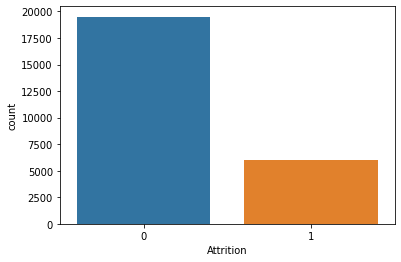

In [67]:
sns.countplot(hr_data["Attrition"])

#Data Visualisation

Text(0.5, 1.0, 'Attrition per department')

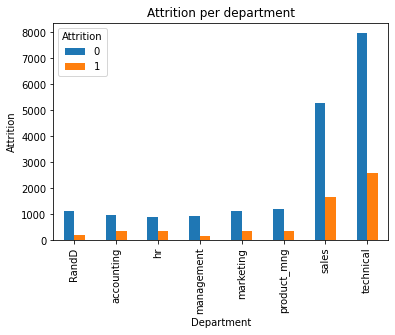

In [68]:
#Attrition per department
pd.crosstab(hr_data["Department"],hr_data["Attrition"]).plot(kind='bar')
plt.xlabel("Department")
plt.ylabel("Attrition")
plt.title("Attrition per department")

Text(0.5, 1.0, 'Stacked Bar Chart of salary level vs Turnover')

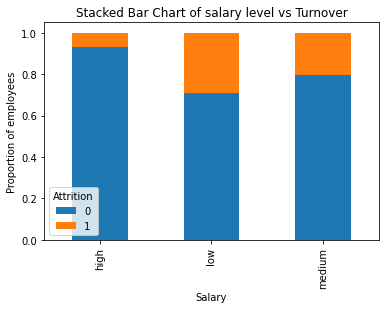

In [69]:
#Attrition per salary
table =  pd.crosstab(hr_data.salary,hr_data.Attrition)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel("Salary")
plt.ylabel("Proportion of employees")
plt.title("Stacked Bar Chart of salary level vs Turnover")

In [70]:
pd.crosstab(hr_data.Department,hr_data.Attrition)

Attrition,0,1
Department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


<function matplotlib.pyplot.show>

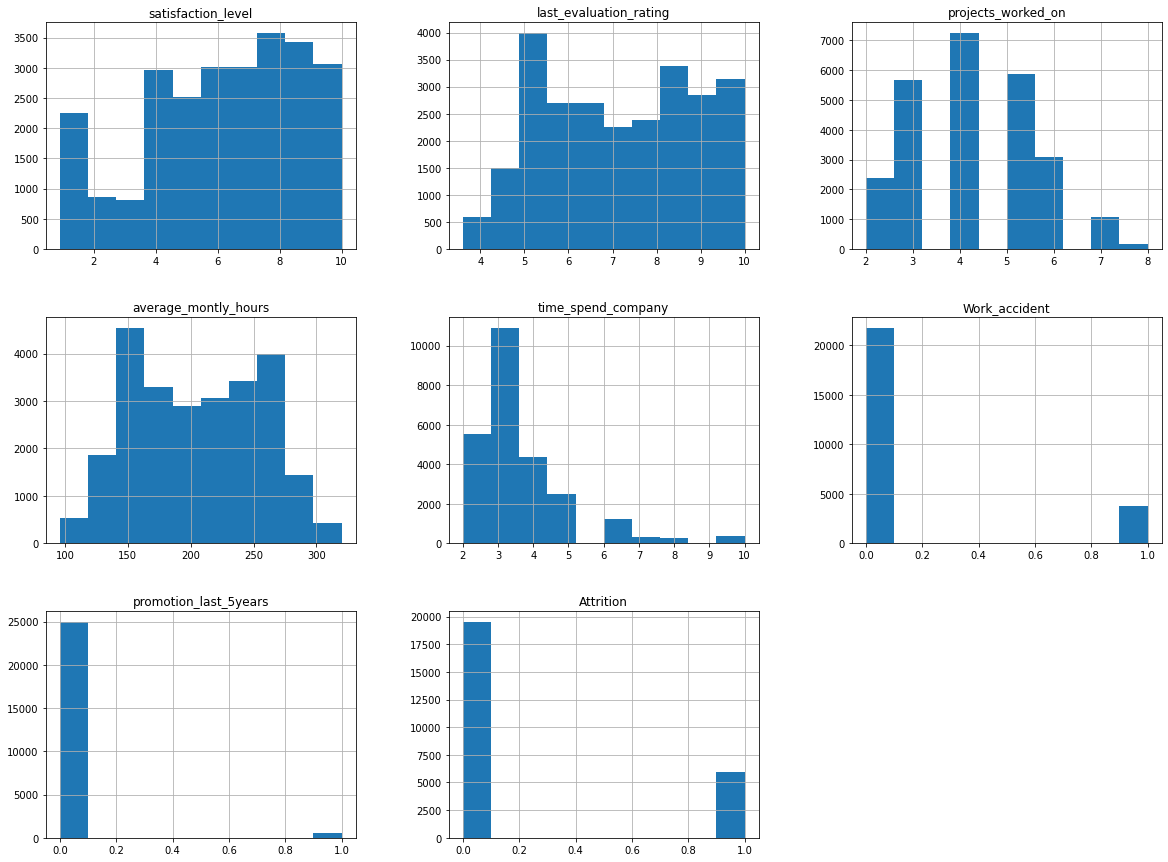

In [71]:
num_bins = 10
hr_data.hist(bins=num_bins,figsize=(20,15)) #Plotting Data histogram
plt.savefig("Histogram : Department Vs Attrition")
plt.show

In [78]:
#convert categorical data into numerical values
cat_vars=['Department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr_data[var], prefix=var) #one hot encoding
    hr1=hr_data.join(cat_list)
    hr_data=hr1

In [80]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
 10  Department_RandD        25491 non-null  uint8  
 11  Department_accounting   25491 non-null  uint8  
 12  Department_hr           25491 non-null  uint8  
 13  Department_management   25491 non-null  uint8  
 14  Department_marketing    25491 non-null

In [81]:
hr_data.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,sales,low,1,0,0,0,0,0,0,1,0,0,1,0
1,8.0,8.6,6,272,6,0,0,sales,medium,1,0,0,0,0,0,0,1,0,0,0,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1,0,0,0,0,0,0,1,0,0,0,1
3,3.7,5.2,3,169,3,0,0,sales,low,1,0,0,0,0,0,0,1,0,0,1,0
4,4.1,5.0,3,163,3,0,0,sales,low,1,0,0,0,0,0,0,1,0,0,1,0


In [86]:
#we can drop 'Department','salary' to ensure all values are numerical only
hr_data = hr_data.drop(columns=['Department','salary'],axis=1)
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Attrition               25491 non-null  int64  
 8   Department_RandD        25491 non-null  uint8  
 9   Department_accounting   25491 non-null  uint8  
 10  Department_hr           25491 non-null  uint8  
 11  Department_management   25491 non-null  uint8  
 12  Department_marketing    25491 non-null  uint8  
 13  Department_product_mng  25491 non-null  uint8  
 14  Department_sales        25491 non-null

In [120]:
#now we need to get X1 and Y1
X = hr_data.drop(columns=['Attrition'],axis=1)
y = hr_data['Attrition']

In [121]:
X.columns

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [122]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

#Feature Selection

In [123]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
from sklearn.feature_selection import RFE #recursive feature elimination
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model,10) #it means we want only 10 features
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]


Columns marked as true are most important and can be used in building model

In [135]:
cols=['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years','Department_RandD', 'Department_hr', 'Department_management', 'salary_high', 'salary_low','salary_medium'] 
cols

['satisfaction_level',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_hr',
 'Department_management',
 'salary_high',
 'salary_low',
 'salary_medium']

In [139]:
X = X[cols] 
X.columns

Index(['satisfaction_level', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_hr',
       'Department_management', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [141]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

##Train Test split

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.766


In [145]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.965


In [146]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.891


In [147]:
#XGBClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
print('XGBoost accuracy: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))

XGBoost accuracy: 0.957


K Fold Cross Validation https://scikit-learn.org/stable/modules/cross_validation.html

In [148]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


cross validation average accuracy for Random Forest Classifier: 0.962


In [149]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


cross validation average accuracy for SVM Classifier: 0.891


In [150]:
#For XGBoost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for XGBoost Classifier: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


cross validation average accuracy for XGBoost Classifier: 0.956


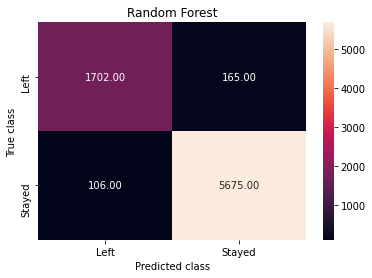

In [151]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

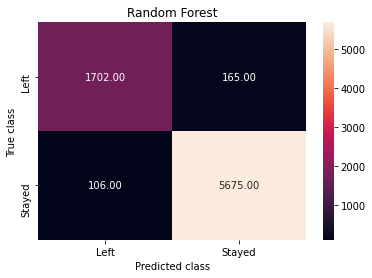

In [152]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

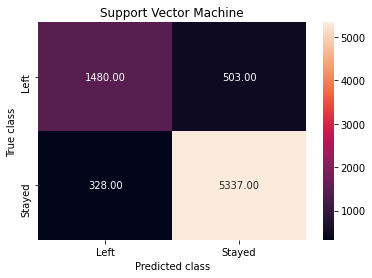

In [153]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

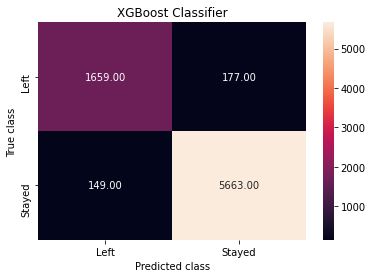

In [154]:
#Confusion Matrix for XGBoost Classifier
xgb_y_pred = xgb.predict(X_test)
xgb_cm = metrics.confusion_matrix(xgb_y_pred, y_test, [1,0])
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBoost Classifier')
plt.savefig('XGBoost_Classifier')

Variable Importance for Random Forest Classifier

In [155]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])

importance = rf.feature_importances_ #https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

feature_indexes_by_importance = importance.argsort()

for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.34%
department_hr-0.38%
department_RandD-0.39%
salary_medium-0.41%
promotion_last_5years-0.45%
salary_high-0.85%
salary_low-1.01%
Work_accident-2.17%
time_spend_company-32.50%
satisfaction_level-61.49%
